## 1.Prediccion de valores faltantes para analisis 2020-2024

Los datos recopilados sobre el transporte de monterrey en el sitio del inegi muestran valores de hasta el 2024, no obstante, los valores de los indicadores obtenidos desde la api muestran como ultima fecha 2020/2022. En base a lo anterior, se busca analizar los datos y utilizar un modelo para predecir los valores faltantes para posteriormente incluirlos al analisis.

El procedimiento se muestra a continuacion:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
#Cargar data
data= pd.read_csv('ingreso_trim_hogarNL.csv')

### Dataset ingreso trimestral por hogar NL

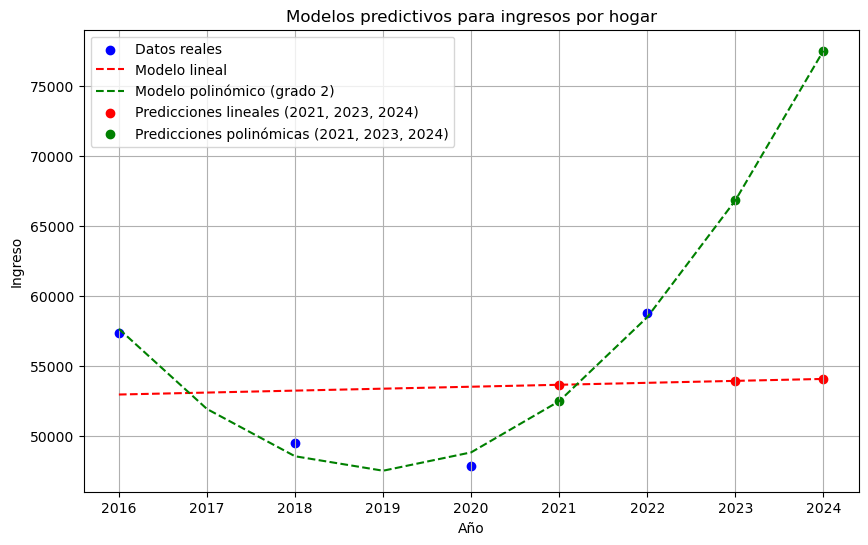

(array([53644.504973, 53923.534811, 54063.04973 ]),
 array([52470.51118183, 66837.46643162, 77542.92541122]))

In [3]:
# Extraer las variables de interés
X = data['year'].values.reshape(-1, 1)
y = data['ingreso'].values

# Ajustar un modelo lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predicciones lineales para los años 2021-2024
future_years = np.array([2021, 2023, 2024]).reshape(-1, 1)
linear_predictions = linear_model.predict(future_years)

# Ajustar un modelo polinómico (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predicciones polinómicas para los años 2021-2024
future_years_poly = poly.transform(future_years)
poly_predictions = poly_model.predict(future_years_poly)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(range(2016, 2025), linear_model.predict(np.array(range(2016, 2025)).reshape(-1, 1)), 
         color='red', linestyle='--', label='Modelo lineal')
plt.plot(range(2016, 2025), poly_model.predict(poly.transform(np.array(range(2016, 2025)).reshape(-1, 1))), 
         color='green', linestyle='--', label='Modelo polinómico (grado 2)')
plt.scatter(future_years, linear_predictions, color='red', label='Predicciones lineales (2021, 2023, 2024)')
plt.scatter(future_years, poly_predictions, color='green', label='Predicciones polinómicas (2021, 2023, 2024)')
plt.title('Modelos predictivos para ingresos por hogar')
plt.xlabel('Año')
plt.ylabel('Ingreso')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones
linear_predictions, poly_predictions


El modelo polinomial de segundo grado muestra un comportamiento mas cercano a los resultados de entrenamiento, sugiriendo una mejor prediccion para este caso. No obstante, considerando el panorama actual del año 2024, los valores se aproximan mas a los del modelo no transformado.

Comparando los valores anteriores con los realizados con la funcion forecast.linear() de excel; lo cual se realizo para obtener los datos de una manera mas rapida. Los valores son identicos a la prediccion linear.

![Prediccion Excel Ingreso trim transporte NL](ingreso_trim_hogarNL_prediccion.png)

### Dataset gasto trimestral por hogar en transporte NL

In [4]:
data= pd.read_csv('Gasto_trim_transp_NL.csv')

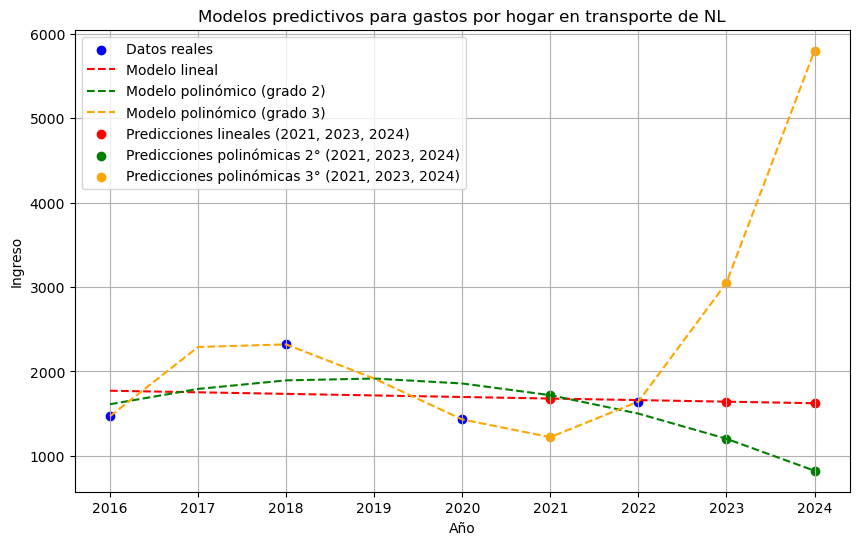

(array([1678.5, 1641.5, 1623. ]),
 array([1718.49999997, 1201.49999908,  822.99999845]),
 array([1221.13305664, 3051.06018066, 5801.19458008]))

In [6]:
X = data['year'].values.reshape(-1, 1)
y = data['gasto'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

future_years = np.array([2021, 2023, 2024]).reshape(-1, 1)
linear_predictions = linear_model.predict(future_years)

# Modelo polinómico (grado 2)
poly_2= PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_2, y)

#Modelo polinomico(grado 3)
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)

future_years_poly_2 = poly_2.transform(future_years)
future_years_poly_3 = poly_3.transform(future_years)

poly_predictions_2 = poly_model_2.predict(future_years_poly_2)
poly_predictions_3 = poly_model_3.predict(future_years_poly_3)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(range(2016, 2025), linear_model.predict(np.array(range(2016, 2025)).reshape(-1, 1)), 
         color='red', linestyle='--', label='Modelo lineal')
plt.plot(range(2016, 2025), poly_model_2.predict(poly_2.transform(np.array(range(2016, 2025)).reshape(-1, 1))), 
         color='green', linestyle='--', label='Modelo polinómico (grado 2)')
plt.plot(range(2016, 2025), poly_model_3.predict(poly_3.transform(np.array(range(2016, 2025)).reshape(-1, 1))), 
         color='orange', linestyle='--', label='Modelo polinómico (grado 3)')
plt.scatter(future_years, linear_predictions, color='red', label='Predicciones lineales (2021, 2023, 2024)')
plt.scatter(future_years, poly_predictions_2, color='green', label='Predicciones polinómicas 2° (2021, 2023, 2024)')
plt.scatter(future_years, poly_predictions_3, color='orange', label='Predicciones polinómicas 3° (2021, 2023, 2024)')
plt.title('Modelos predictivos para gastos por hogar en transporte de NL')
plt.xlabel('Año')
plt.ylabel('Ingreso')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones
linear_predictions, poly_predictions_2, poly_predictions_3

Si bien el modelo de tercer grado predice los valores con exactitud, los valores predichos para el contexto actual no concuerdan. De igual manera el modelo de segundo grado muestra un decremento en este gasto lo cual no es el mas acercado a la realidad.
Por otra parte el modelo lineal ofrece un valor mas acercado a la realidad en Monterrey actualmente. Por lo tanto, se tomaran estos valores para el analisis posterior. La deficiencia en la exactitud de estas predicciones esta relacionada al numero de datos recopilados, la adicion de mas valores reales al modelo podria ayudar a predecir los valores correctos.

*NOTA:* se normalizaron las muestras con el fin de observar mejores resultados para los modelos polinomicos, no obstante, sus valores no cambian demasiado y no se acercan a la realidad del gasto promedio en transporte en NL.

Conforme a la prueba de excel, los valores obtenidos se muestran similares a los del modelo lineal.

![Prediccion Excel Gasto trim transporte NL](Gasto_trim_transp_NL_prediccion.png)

### Dataset poblacion total NL

In [6]:
data= pd.read_csv('poblacion_total.csv')

In [4]:
#Crear un indice de cada code de municipio unico
indice= data['code'].unique()

In [5]:
#Verificar que filtre los valores que ocupo
microtable = data[data['code'] == indice[0]][['Year', 'Poblacion_total', 'code']]
microtable

,Year,Poblacion_total,code
0,1995,219153.0,70000190006
1,2000,283497.0,70000190006
2,2005,418784.0,70000190006
3,2010,523370.0,70000190006
4,2020,656464.0,70000190006


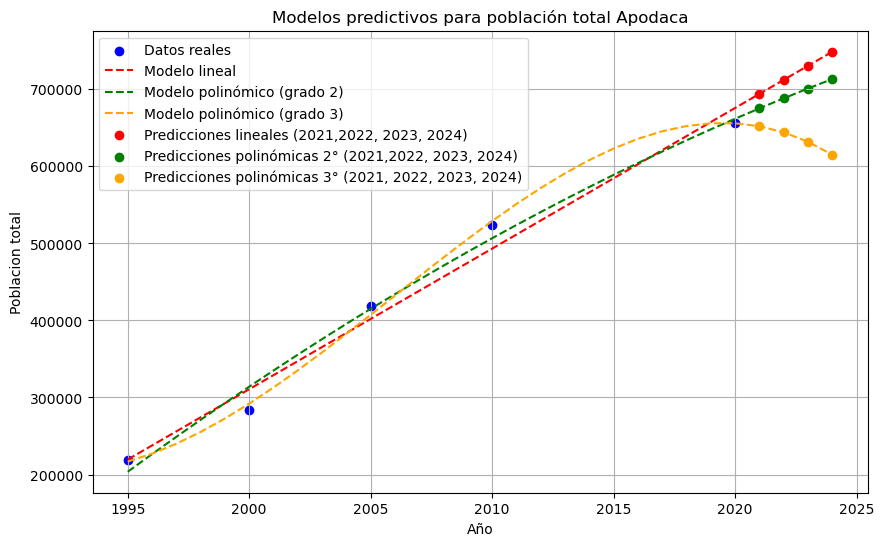

Predicciones modelo lineal: [694045.23513514 712298.01081081 730550.78648649 748803.56216217]
Predicciones modelo polinómico (grado 2): [675274.81431246 688343.76535583 701037.00335014 713354.52829587]
Predicciones modelo polinómico (grado 3): [652084.31286621 644190.04467773 631941.72473145 615068.34484863]
R^2 para el modelo lineal: 0.9817
R^2 para el modelo polinómico (grado 2): 0.98810
R^2 para el modelo polinómico (grado 3): 0.99808


In [6]:
#Investigar cual es el mejor modelo usando solo un municipio

X = microtable['Year'].values.reshape(-1, 1)
y = microtable['Poblacion_total'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

future_years = np.array([2021,2022, 2023, 2024]).reshape(-1, 1)
linear_predictions = linear_model.predict(future_years)

# Modelo polinómico (grado 2)
poly_2= PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_2, y)

#Modelo polinomico(grado 3)
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)

future_years_poly_2 = poly_2.transform(future_years)
future_years_poly_3 = poly_3.transform(future_years)

poly_predictions_2 = poly_model_2.predict(future_years_poly_2)
poly_predictions_3 = poly_model_3.predict(future_years_poly_3)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(range(1995, 2025), linear_model.predict(np.array(range(1995, 2025)).reshape(-1, 1)), 
         color='red', linestyle='--', label='Modelo lineal')
plt.plot(range(1995, 2025), poly_model_2.predict(poly_2.transform(np.array(range(1995, 2025)).reshape(-1, 1))), 
         color='green', linestyle='--', label='Modelo polinómico (grado 2)')
plt.plot(range(1995, 2025), poly_model_3.predict(poly_3.transform(np.array(range(1995, 2025)).reshape(-1, 1))), 
         color='orange', linestyle='--', label='Modelo polinómico (grado 3)')
plt.scatter(future_years, linear_predictions, color='red', label='Predicciones lineales (2021,2022, 2023, 2024)')
plt.scatter(future_years, poly_predictions_2, color='green', label='Predicciones polinómicas 2° (2021,2022, 2023, 2024)')
plt.scatter(future_years, poly_predictions_3, color='orange', label='Predicciones polinómicas 3° (2021, 2022, 2023, 2024)')
plt.title('Modelos predictivos para población total Apodaca')
plt.xlabel('Año')
plt.ylabel('Poblacion total')
plt.legend()
plt.grid(True)
plt.show()

lp=linear_predictions
pm2p=poly_predictions_2
pm3p=poly_predictions_3
# Mostrar las predicciones
print(f'Predicciones modelo lineal: {lp}')
print(f'Predicciones modelo polinómico (grado 2): {pm2p}')
print(f'Predicciones modelo polinómico (grado 3): {pm3p}')

#Medir valores de R^2
r2_linear = linear_model.score(X, y)

# R^2 polinómico (grado 2)
r2_poly_2 = poly_model_2.score(X_poly_2, y)

# R^2 polinómico (grado 3)
r2_poly_3 = poly_model_3.score(X_poly_3, y)

# Mostrar los valores de R^2
print(f'R^2 para el modelo lineal: {r2_linear:.4f}')
print(f'R^2 para el modelo polinómico (grado 2): {r2_poly_2:.5f}')
print(f'R^2 para el modelo polinómico (grado 3): {r2_poly_3:.5f}')

Para el municipio analizado "Apodaca", los modelos de segundo y tecer grado muestran valores de R^2 muy similares, por lo tanto se analizara otro municipio para seleccionar el modelo mas adecuado.

In [7]:
microtable = data[data['code'] == indice[8]][['Year', 'Poblacion_total', 'code']]
microtable

,Year,Poblacion_total,code
40,1995,1088143.0,70000190039
41,2000,1110997.0,70000190039
42,2005,1133814.0,70000190039
43,2010,1135550.0,70000190039
44,2020,1142994.0,70000190039


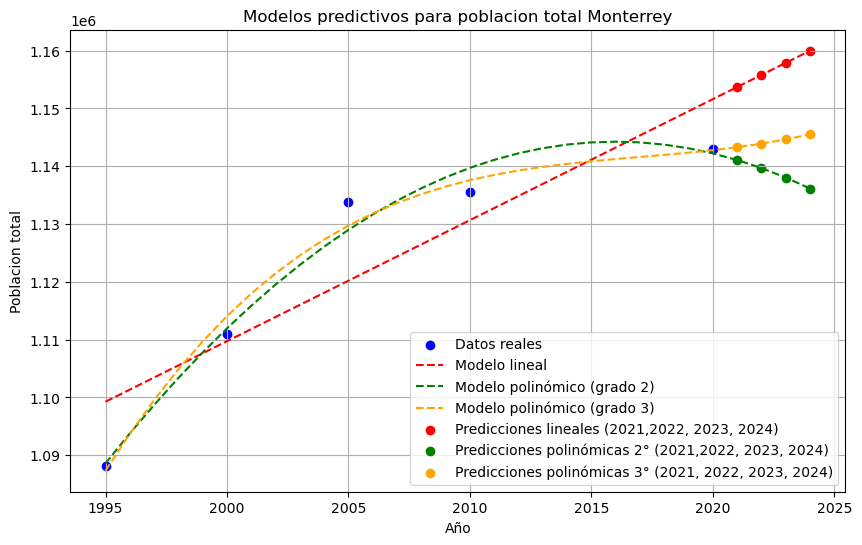

Predicciones modelo lineal: [1153708.26216216 1155802.17297297 1157896.08378378 1159989.99459459]
Predicciones modelo polinómico (grado 2): [1141082.72241521 1139689.83958668 1138044.24105865 1136145.92683101]
Predicciones modelo polinómico (grado 3): [1143297.26230621 1143907.37871552 1144644.9204483  1145535.7831955 ]
R^2 para el modelo lineal: 0.7988
R^2 para el modelo polinómico (grado 2): 0.97916
R^2 para el modelo polinómico (grado 3): 0.98479


In [8]:
#Repetir con otro municipio
X = microtable['Year'].values.reshape(-1, 1)
y = microtable['Poblacion_total'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

future_years = np.array([2021,2022, 2023, 2024]).reshape(-1, 1)
linear_predictions = linear_model.predict(future_years)

# Modelo polinómico (grado 2)
poly_2= PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_2, y)

#Modelo polinomico(grado 3)
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)

future_years_poly_2 = poly_2.transform(future_years)
future_years_poly_3 = poly_3.transform(future_years)

poly_predictions_2 = poly_model_2.predict(future_years_poly_2)
poly_predictions_3 = poly_model_3.predict(future_years_poly_3)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(range(1995, 2025), linear_model.predict(np.array(range(1995, 2025)).reshape(-1, 1)), 
         color='red', linestyle='--', label='Modelo lineal')
plt.plot(range(1995, 2025), poly_model_2.predict(poly_2.transform(np.array(range(1995, 2025)).reshape(-1, 1))), 
         color='green', linestyle='--', label='Modelo polinómico (grado 2)')
plt.plot(range(1995, 2025), poly_model_3.predict(poly_3.transform(np.array(range(1995, 2025)).reshape(-1, 1))), 
         color='orange', linestyle='--', label='Modelo polinómico (grado 3)')
plt.scatter(future_years, linear_predictions, color='red', label='Predicciones lineales (2021,2022, 2023, 2024)')
plt.scatter(future_years, poly_predictions_2, color='green', label='Predicciones polinómicas 2° (2021,2022, 2023, 2024)')
plt.scatter(future_years, poly_predictions_3, color='orange', label='Predicciones polinómicas 3° (2021, 2022, 2023, 2024)')
plt.title('Modelos predictivos para poblacion total Monterrey')
plt.xlabel('Año')
plt.ylabel('Poblacion total')
plt.legend()
plt.grid(True)
plt.show()

lp=linear_predictions
pm2p=poly_predictions_2
pm3p=poly_predictions_3
# Mostrar las predicciones
print(f'Predicciones modelo lineal: {lp}')
print(f'Predicciones modelo polinómico (grado 2): {pm2p}')
print(f'Predicciones modelo polinómico (grado 3): {pm3p}')

#Medir valores de R^2
r2_linear = linear_model.score(X, y)

# R^2 polinómico (grado 2)
r2_poly_2 = poly_model_2.score(X_poly_2, y)

# R^2 polinómico (grado 3)
r2_poly_3 = poly_model_3.score(X_poly_3, y)

# Mostrar los valores de R^2
print(f'R^2 para el modelo lineal: {r2_linear:.4f}')
print(f'R^2 para el modelo polinómico (grado 2): {r2_poly_2:.5f}')
print(f'R^2 para el modelo polinómico (grado 3): {r2_poly_3:.5f}')

Para el municipio de Monterrey se muestra un fenomeno similar, aunque es distintivo que el modelo polinomico de tercer grado es el adecuado en base al valor de R^2, por lo que se utilizara este para hacer las predicciones de todos los municipios.

In [9]:
#Funcion para recopilar los datos y crear un dataframe
def combinar_a_dataframe(array1, array2, code):
    """
    Combina valores de dos arrays y una constante fila por fila en un DataFrame.

    :param array1: Primer array (lista de valores).
    :param array2: Segundo array (lista de valores).
    :param code: codigo de municipio.
    :return: Lista de valores recopilados.
    """
    if len(array1) != len(array2):
        raise ValueError("Todos los arrays deben tener la misma longitud.")

    for a, b in zip(array1, array2):
        datos.append([a, b, code])
        
    return datos

In [10]:
#Hacer predicciones para cada municipio
datos = []
for valor in indice:
    #Filtrar por cada municipio
    microtable = data[data['code'] == valor][['Year', 'Poblacion_total', 'code']]
    
    X = microtable['Year'].values.reshape(-1, 1)
    y = microtable['Poblacion_total'].values

    future_years = np.array([2021,2022, 2023, 2024]).reshape(-1, 1)

    #Modelo polinomico(grado 3)
    poly_3 = PolynomialFeatures(degree=3)
    X_poly_3 = poly_3.fit_transform(X)
    poly_model_3 = LinearRegression()
    poly_model_3.fit(X_poly_3, y)

    future_years_poly_3 = poly_3.transform(future_years)
    
    poly_predictions_3 = poly_model_3.predict(future_years_poly_3)
    
    combinar_a_dataframe(future_years, poly_predictions_3, code = valor)
    
columnas=['Year', 'Poblacion_total', 'code']
municipiopredict = pd.DataFrame(datos, columns=columnas)

In [12]:
#Remover los corchetes
municipiopredict['Year'] = municipiopredict['Year'].astype(str).str.replace(r'\[|\]', '', regex=True)
municipiopredict

,Year,Poblacion_total,code
0,2021,6.520843e+05,70000190006
1,2022,6.441900e+05,70000190006
2,2023,6.319417e+05,70000190006
3,2024,6.150683e+05,70000190006
4,2021,1.292723e+05,70000190009
5,2022,1.367063e+05,70000190009
6,2023,1.448731e+05,70000190009
7,2024,1.538124e+05,70000190009
8,2021,1.207735e+05,70000190010
9,2022,1.387774e+05,70000190010


Utilizamos concat para unir los valores nuevos con los valores base

In [13]:
df_combined = pd.concat([data, municipiopredict], ignore_index=True)

,Year,Poblacion_total,code
0,1995,219153.0,70000190006
1,2000,283497.0,70000190006
2,2005,418784.0,70000190006
3,2010,523370.0,70000190006
4,2020,656464.0,70000190006


In [15]:
df_combined.to_csv("poblacion_total_prediccion.csv", index=False)

## 2. Limpieza de dataset INEGI movilidad NL.

El dataset obtenido sobre los datos del INEGI requiere de algunas modificaciones para su correcto uso, es por tanto que esta seccion se enfocara en corregir los detalles para posteriormente realizar el analisis en conjunto.

In [7]:
movil= pd.read_csv('TransporteNL_inegi.csv')

In [9]:
movil.head(5)

,Unidades en operacion de L-V,Unidades en operacion de S-D,Miles de km recorridos,Pasajeros transportados-total,month,year,ecovia,metro,metrobus,transmetro,Pasajeros transportados-tarifa completa,Pasajeros transportados-con descuento,Pasajeros transportados-con cortesia,Numero de rutas,Personal ocupado,Ingresos miles de pesos de pasajes,Miles de KWH consumido
0,-,-,-,-,Enero,2020,1,0,0,0,-,-,-,-,-,-,-
1,-,-,-,-,Febrero,2020,1,0,0,0,-,-,-,-,-,-,-
2,-,-,-,-,Marzo,2020,1,0,0,0,-,-,-,-,-,-,-
3,-,-,-,-,Abril,2020,1,0,0,0,-,-,-,-,-,-,-
4,38,25,"254,439.00","811,646.00",Mayo,2020,1,0,0,0,"557,095.00","137,544.00","117,007.00",-,-,-,-


In [7]:
print(movil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unidades en operacion de L-V             240 non-null    object
 1   Unidades en operacion de S-D             240 non-null    object
 2   Miles de km recorridos                   240 non-null    object
 3   Pasajeros transportados-total            240 non-null    object
 4   month                                    240 non-null    object
 5   year                                     240 non-null    int64 
 6   ecovia                                   240 non-null    int64 
 7   metro                                    240 non-null    int64 
 8   metrobus                                 240 non-null    int64 
 9   transmetro                               240 non-null    int64 
 10  Pasajeros transportados-tarifa completa  240 non-null    objec

Utilizando el metodo info() podemos observar los valores nulos no fueron detectados, ademas de que el tipo de dato de algunas columnas no es el adecuado.
Para el caso del valor nulo, en las primeras cuatro columnas es de alta importancia que contengan datos, de otra manera son irrelevantes, por lo tanto se eliminaran las filas que no cumplan con tener algun valor.

In [10]:
movil.replace('-', np.nan, inplace= True)
movil.dropna(subset=['Unidades en operacion de L-V', 'Unidades en operacion de S-D',
                    'Miles de km recorridos', 'Pasajeros transportados-total'],axis=0 ,inplace=True)

Ahora hay que cambiar los tipos de dato de las columnas. Sin embargo, hay que eliminar el caracter "," de los numericos para una correcta conversion a float.

In [16]:
def remover_comas(df, columnas=[]):
    """
    Remueve comas de strings que son numeros
    columnas: lista de columnas a las que se quiere remover ","
    """
    for element in columnas:
        df[element] = df[element].str.replace(',', '')

In [23]:
#list of columns to remove comma
colu=['Miles de km recorridos', 'Pasajeros transportados-total', 'Pasajeros transportados-tarifa completa',
     'Pasajeros transportados-con cortesia','Pasajeros transportados-con descuento', 'Miles de KWH consumido',
     'Ingresos miles de pesos de pasajes', 'Personal ocupado']
remover_comas(movil,columnas= colu)

In [25]:
#convertir incluso los int a float
movil = movil.astype({
    'Unidades en operacion de L-V': 'float',
    'Unidades en operacion de S-D': 'float',
    'Miles de km recorridos': 'float',
    'Pasajeros transportados-total': 'float',
    'month': 'string',
    'year': 'string',
    'Pasajeros transportados-tarifa completa': 'float',
    'Pasajeros transportados-con descuento': 'float',
    'Pasajeros transportados-con cortesia': 'float',
    'Numero de rutas': 'float',
    'Personal ocupado': 'float',
    'Ingresos miles de pesos de pasajes': 'float',
    'Miles de KWH consumido': 'float'
})
#convertir a int los valores que quiero
movil = movil.astype({'Pasajeros transportados-tarifa completa': 'Int64',
    'Pasajeros transportados-con descuento': 'Int64',
    'Pasajeros transportados-con cortesia': 'Int64',
    'Numero de rutas': 'Int64',
    'Personal ocupado': 'Int64'})

Finalmente, para la columna 'Miles de km recorridos' los valores de ecovia fueron reportados como km recorridos. Por lo tanto hay que actualizar esos valores para que todos los valores esten en regla.

In [29]:
movil.loc[movil['ecovia'] == 1, 'Miles de km recorridos'] = movil.loc[movil['ecovia'] == 1, 'Miles de km recorridos'] / 1000

In [34]:
movil.head(3)

,Unidades en operacion de L-V,Unidades en operacion de S-D,Miles de km recorridos,Pasajeros transportados-total,month,year,ecovia,metro,metrobus,transmetro,Pasajeros transportados-tarifa completa,Pasajeros transportados-con descuento,Pasajeros transportados-con cortesia,Numero de rutas,Personal ocupado,Ingresos miles de pesos de pasajes,Miles de KWH consumido
4,38.0,25.0,254.439,811646.0,Mayo,2020,1,0,0,0,557095,137544,117007,<NA>,<NA>,NaN,NaN
5,39.0,24.0,248.738,1024395.0,Junio,2020,1,0,0,0,694198,182774,147423,<NA>,<NA>,NaN,NaN
6,38.0,24.0,237.267,967217.0,Julio,2020,1,0,0,0,659557,170705,136955,<NA>,<NA>,NaN,NaN


In [39]:
movil.to_csv("transporte_nl_inegi_limpio.csv", index=False)